<a href="https://colab.research.google.com/github/jumanajouhar/customersegmentation/blob/main/customersegmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
import pandas as pd

# Load the dataset
url = 'https://raw.githubusercontent.com/tirthajyoti/Machine-Learning-with-Python/master/Datasets/Mall_Customers.csv'
data = pd.read_csv(url)

# Inspect the first few rows of the dataset
print("First few rows of the dataset:")
print(data.head())

# Display dataset information
print("\nDataset info:")
print(data.info())

# Drop 'CustomerID' and 'Gender' columns as they're not needed for clustering
data = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

First few rows of the dataset:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


In [ ]:
# Import necessary libraries for scaling
from sklearn.preprocessing import StandardScaler

# Scale the features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

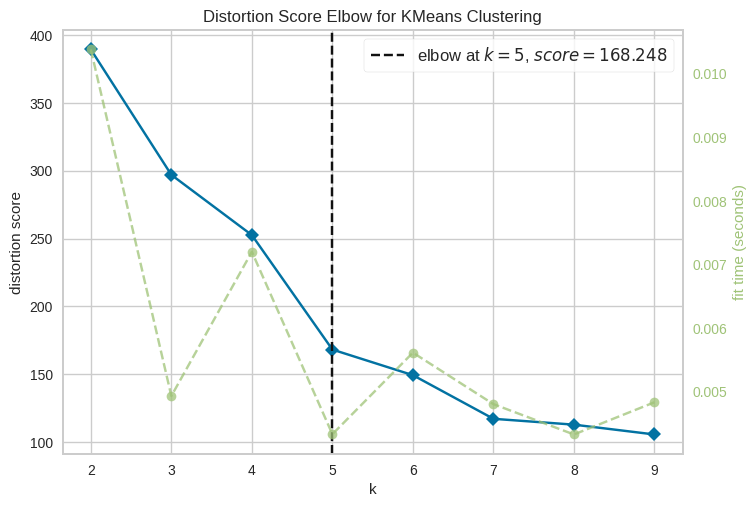


Silhouette Scores for different values of k:
For k=2, the Silhouette Score is: 0.33547192894004574
For k=3, the Silhouette Score is: 0.35027143562558555
For k=4, the Silhouette Score is: 0.34983789408081173
For k=5, the Silhouette Score is: 0.41664341513732767
For k=6, the Silhouette Score is: 0.3926245613672707
For k=7, the Silhouette Score is: 0.42190482256145484
For k=8, the Silhouette Score is: 0.4093257483167767
For k=9, the Silhouette Score is: 0.37662187748041265


In [ ]:
# Import necessary libraries for clustering and visualization
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# Determine optimal number of clusters using the Elbow Method
model = KMeans(random_state=0)
visualizer = KElbowVisualizer(model, k=(2,10))
visualizer.fit(data_scaled)
visualizer.show()

# Optional: Calculate Silhouette Scores for further validation
from sklearn.metrics import silhouette_score
print("\nSilhouette Scores for different values of k:")
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(data_scaled)
    score = silhouette_score(data_scaled, kmeans.labels_)
    print(f"For k={k}, the Silhouette Score is: {score}")

In [ ]:
# Set the optimal number of clusters (e.g., optimal_k = visualizer.elbow_value_)
optimal_k = visualizer.elbow_value_

# Apply K-Means with optimal_k clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=0)
clusters = kmeans.fit_predict(data_scaled)

# Add the cluster labels to the original data
data['Cluster'] = clusters


Cluster Summary:
               Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                       
0        55.638298           54.382979               48.851064
1        39.871795           86.102564               19.358974
2        32.875000           86.100000               81.525000
3        46.250000           26.750000               18.350000
4        25.185185           41.092593               62.240741


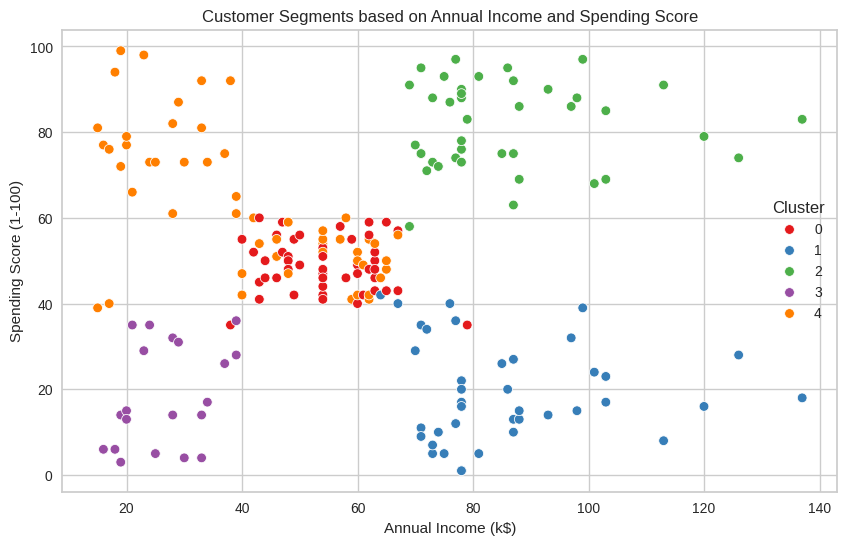

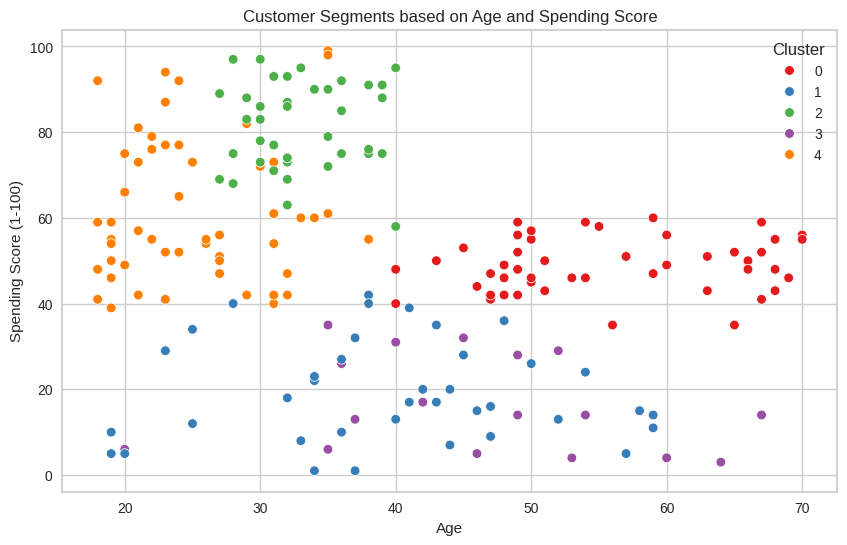

In [ ]:
# Calculate mean values for each feature in each cluster
cluster_summary = data.groupby('Cluster').mean()
print("\nCluster Summary:")
print(cluster_summary)

# Import necessary libraries for visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Plot clusters based on Annual Income vs Spending Score
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=data, palette='Set1')
plt.title("Customer Segments based on Annual Income and Spending Score")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend(title="Cluster")
plt.show()

# Plot clusters based on Age vs Spending Score
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Spending Score (1-100)', hue='Cluster', data=data, palette='Set1')
plt.title("Customer Segments based on Age and Spending Score")
plt.xlabel("Age")
plt.ylabel("Spending Score (1-100)")
plt.legend(title="Cluster")
plt.show()

In [ ]:
# Print actionable insights based on cluster characteristics
print("\nActionable Insights for Marketing:")
for cluster, summary in cluster_summary.iterrows():
    print(f"\nCluster {cluster} Summary:")
    print(summary)

    # Example insights based on cluster attributes
    if summary['Annual Income (k$)'] > 70 and summary['Spending Score (1-100)'] < 50:
        print("This segment represents high-income customers with low spending. Target them with premium offers or incentives to increase spending.")
    elif summary['Annual Income (k$)'] < 40 and summary['Spending Score (1-100)'] > 60:
        print("This segment represents lower-income customers with high spending scores. Consider loyalty programs or discounts to retain them.")
    elif summary['Age'] < 30 and summary['Spending Score (1-100)'] > 60:
        print("This segment is younger and has a high spending score. Engage with social media campaigns and exclusive offers to retain interest.")
    elif summary['Age'] > 50 and summary['Spending Score (1-100)'] < 50:
        print("This segment represents older, lower-spending customers. Consider loyalty discounts or senior-focused promotions to increase engagement.")
    else:
        print("For this segment, consider general engagement strategies or promotions.")


Actionable Insights for Marketing:

Cluster 0 Summary:
Age                       55.638298
Annual Income (k$)        54.382979
Spending Score (1-100)    48.851064
Name: 0, dtype: float64
This segment represents older, lower-spending customers. Consider loyalty discounts or senior-focused promotions to increase engagement.

Cluster 1 Summary:
Age                       39.871795
Annual Income (k$)        86.102564
Spending Score (1-100)    19.358974
Name: 1, dtype: float64
This segment represents high-income customers with low spending. Target them with premium offers or incentives to increase spending.

Cluster 2 Summary:
Age                       32.875
Annual Income (k$)        86.100
Spending Score (1-100)    81.525
Name: 2, dtype: float64
For this segment, consider general engagement strategies or promotions.

Cluster 3 Summary:
Age                       46.25
Annual Income (k$)        26.75
Spending Score (1-100)    18.35
Name: 3, dtype: float64
For this segment, consider general 